In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
df_merged_final = pd.read_pickle(r'C:\Users\admin\OneDrive - Aero Operating LLC\Documents\Prepared Data\orders_products_merged_final.pkl')

EOFError: Ran out of input

In [3]:
path = r'C:\Users\admin\OneDrive - Aero Operating LLC\Documents\Prepared Data'

In [4]:
path

'C:\\Users\\admin\\OneDrive - Aero Operating LLC\\Documents\\Prepared Data'

In [5]:
df_merged_final

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency,First Name,Last_name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,30.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,30.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,30.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,30.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,30.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434207,156685,106143,prior,26,4,23,5.0,19675,1,1,...,16.0,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
32434208,484769,66343,prior,1,6,11,NaN,47210,1,0,...,30.0,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32434209,1561557,66343,prior,2,1,11,30.0,47210,1,1,...,30.0,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32434210,276317,66343,prior,3,6,15,19.0,47210,1,1,...,30.0,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151


In [6]:
df_merged_final.head()

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency,First Name,Last_name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,30.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,30.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,30.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,30.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,30.0,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
df_merged_final.shape

(32434212, 32)

<AxesSubplot:ylabel='Frequency'>

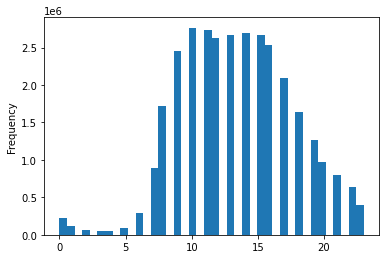

In [10]:
df_merged_final['order_hour_of_day'].plot.hist(bins = 40)

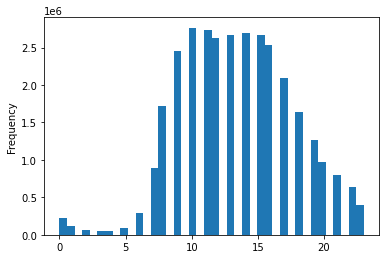

In [35]:
hig2 = df_merged_final['order_hour_of_day'].plot.hist(bins = 40)

In [37]:
hig2.figure.savefig(os.path.join(path, 'order.png'))

In [12]:
# Question 3. The hours of the day when sales peak (are highest) are between 10:00 AM and 3:00 PM

In [14]:
df_merged_final.loc[df_merged_final['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [15]:
df_merged_final.loc[(df_merged_final['max_order'] <= 40) & (df_merged_final['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [16]:
df_merged_final.loc[df_merged_final['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [17]:
df_merged_final['loyalty_flag'].value_counts(dropna = False)

Regular customer    15891077
Loyal customer      10293737
New customer         6249398
Name: loyalty_flag, dtype: int64

In [18]:
df_merged_final[['user_id', 'loyalty_flag', 'order_number']].head(30)

,user_id,loyalty_flag,order_number
0,1,New customer,1
1,1,New customer,2
2,1,New customer,3
3,1,New customer,4
4,1,New customer,5
5,1,New customer,6
6,1,New customer,7
7,1,New customer,8
8,1,New customer,9
9,1,New customer,10


In [21]:
# Question 4. Customer Loyalty

<AxesSubplot:>

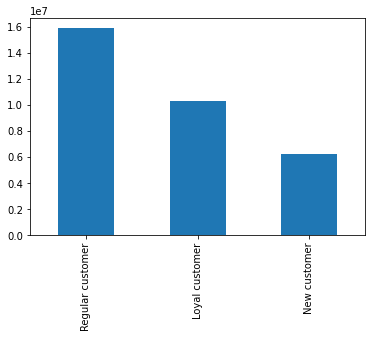

In [20]:
df_merged_final['loyalty_flag'].value_counts().plot.bar()

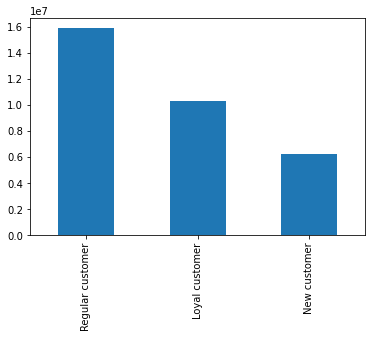

In [38]:
bar2 = df_merged_final['loyalty_flag'].value_counts().plot.bar()

In [39]:
bar2.figure.savefig(os.path.join(path, 'loyalty.png'))

In [22]:
dev = np.random.rand(len(df_merged_final)) <= 0.7

In [23]:
big = df_merged_final[dev]

In [25]:
small = df_merged_final[~dev]

In [26]:
len(df_merged_final)

32434212

In [27]:
len(big) + len(small)

32434212

In [28]:
df_2 = small[['order_hour_of_day','prices']]

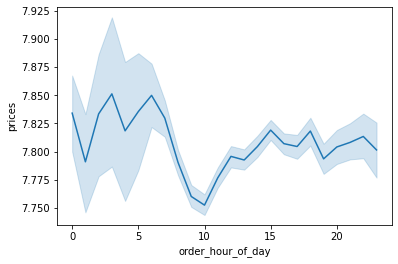

In [29]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [31]:
line.figure.savefig(os.path.join(path, 'hour_of_day.png'))

In [41]:
df_3 = small[['Age','n_dependants']]

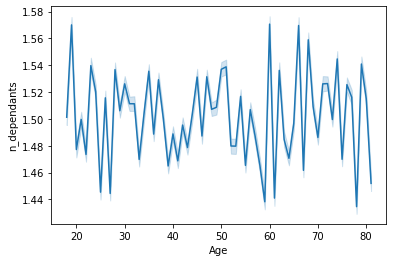

In [42]:
line = sns.lineplot(data = df_3, x = 'Age',y = 'n_dependants')

In [43]:
# Question 6. The line chart shpws that there is absolutely no relationship between age and family situation!

In [45]:
df_4 = small[['Age','income']]

<AxesSubplot:xlabel='Age', ylabel='income'>

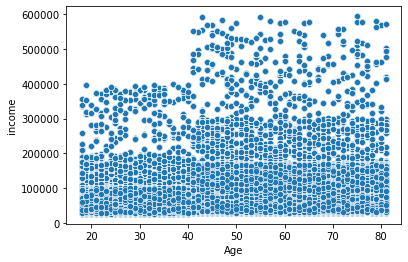

In [46]:
sns.scatterplot(x = 'Age', y = 'income',data = df_4)

In [47]:
# Question 7. The scatterplot indicates that the older you are, the higher your income!

In [1]:
# Export data to pkl

df_merged_final.to_pickle(os.path.join(path, 'orders_products_merged_final.pkl'))

NameError: name 'df_merged_final' is not defined